In [32]:
import pandas as pd
from fbprophet import Prophet
import matplotlib as plt
df = pd.read_csv('~/Downloads/Github/prophet/examples/example_wp_log_peyton_manning.csv')

In [36]:
model = Prophet(interval_width=0.1)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [3]:
future = model.make_future_dataframe(periods = 720)

In [4]:
forecast = model.predict(future)

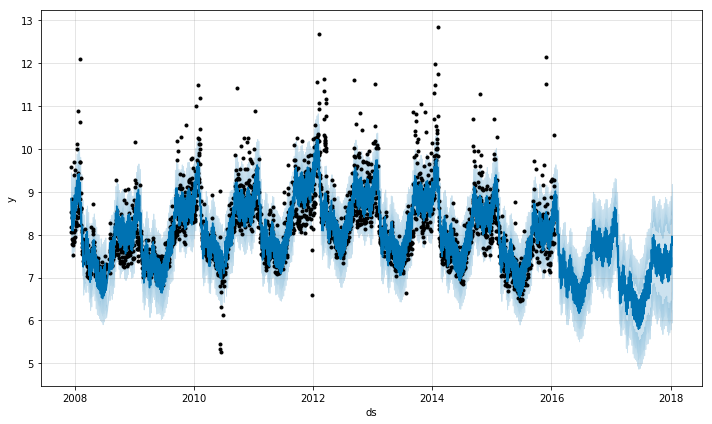

In [5]:
fig1 = model.plot(forecast)

In [6]:
fig1.savefig("fig1.png")

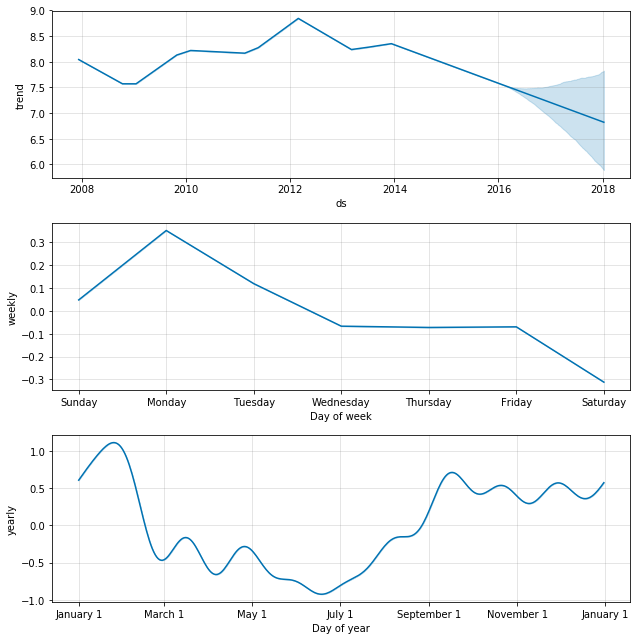

In [12]:
fig2 = model.plot_components(forecast)

In [16]:
from sklearn.metrics import mean_absolute_error
# Use ground truth dataset to train the regression model
# Then inference by ground truth. This can be applied in regression.
data = model.predict(df)

In [21]:
from fbprophet.diagnostics import cross_validation

In [23]:
# Hyperparameters:
# initial, period, horizon in percentage of the whole Time Series
# Target:
# Horizon

df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


In [24]:
df_cv.shape

(3988, 6)

In [42]:
df.shape

(2905, 2)

In [47]:
df.loc[0:731, :]

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [51]:
df_cv.loc[0:730, :]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.960441,8.434211,9.474137,8.242493,2010-02-15
1,2010-02-17,8.726966,8.227228,9.186596,8.008033,2010-02-15
2,2010-02-18,8.610869,8.113587,9.100125,8.045268,2010-02-15
3,2010-02-19,8.532795,8.036549,9.057986,7.928766,2010-02-15
4,2010-02-20,8.274904,7.750021,8.721166,7.745003,2010-02-15
5,2010-02-21,8.606345,8.070686,9.113886,7.866339,2010-02-15
6,2010-02-22,8.833211,8.313189,9.311924,7.941651,2010-02-15
7,2010-02-24,8.364249,7.841059,8.872012,8.310415,2010-02-15
8,2010-02-25,8.285209,7.816844,8.794625,7.828038,2010-02-15
9,2010-02-26,8.246999,7.740034,8.737279,7.873598,2010-02-15


In [32]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3983,2016-01-16,8.580395,7.856062,9.404687,7.817223,2015-01-20
3984,2016-01-17,8.975041,8.192793,9.718854,9.273878,2015-01-20
3985,2016-01-18,9.281189,8.529360,10.001932,10.333775,2015-01-20
3986,2016-01-19,9.064340,8.337948,9.801581,9.125871,2015-01-20
3987,2016-01-20,8.900521,8.160012,9.695887,8.891374,2015-01-20


In [33]:
from fbprophet.plot import plot_cross_validation_metric

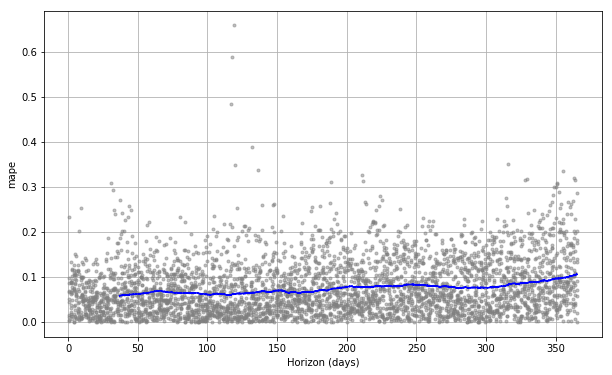

In [35]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [14]:
df_sample = model.predictive_samples(future)

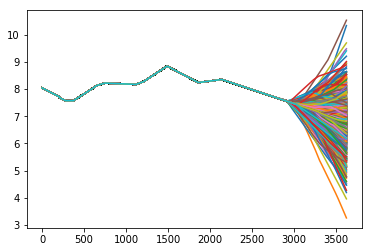

In [20]:
plt.pyplot.plot(df_sample['trend'])

In [21]:
forecast = Prophet(interval_width=0.9).fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [50]:
model = Prophet(interval_width=1, daily_seasonality=True)
model.fit(df)

In [51]:
from sklearn.metrics import mean_absolute_error
data = model.predict(df)
mean_absolute_error(data['yhat'], df['y'])

0.33578192462438816

0.33569535810632656
#### As far as we have difference here, Grid Search is possible

In [29]:
data.shape

(2905, 19)

In [33]:
df.shape

(2905, 2)

In [31]:
data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041239,8.233084,9.438223,8.041239,8.041239,0.802931,0.802931,0.802931,0.352295,0.352295,0.352295,0.450636,0.450636,0.450636,0.0,0.0,0.0,8.844170
1,2007-12-11,8.039695,7.976512,9.205379,8.039695,8.039695,0.553003,0.553003,0.553003,0.119639,0.119639,0.119639,0.433364,0.433364,0.433364,0.0,0.0,0.0,8.592697
2,2007-12-12,8.038151,7.791496,8.975537,8.038151,8.038151,0.350363,0.350363,0.350363,-0.066664,-0.066664,-0.066664,0.417027,0.417027,0.417027,0.0,0.0,0.0,8.388514
3,2007-12-13,8.036607,7.807699,8.989340,8.036607,8.036607,0.329817,0.329817,0.329817,-0.072254,-0.072254,-0.072254,0.402070,0.402070,0.402070,0.0,0.0,0.0,8.366423
4,2007-12-14,8.035063,7.791397,9.006464,8.035063,8.035063,0.319321,0.319321,0.319321,-0.069578,-0.069578,-0.069578,0.388900,0.388900,0.388900,0.0,0.0,0.0,8.354384


In [53]:
data.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2805,2015-10-13,8.888273,6.768181,9.668128,8.888273,8.888273,-0.638732,-0.638732,-0.638732,-1.227971,...,0.119644,0.119644,0.119644,0.469595,0.469595,0.469595,0.0,0.0,0.0,8.249541
2806,2015-10-14,8.887245,6.419070,9.788090,8.887245,8.887245,-0.812587,-0.812587,-0.812587,-1.227971,...,-0.066656,-0.066656,-0.066656,0.482040,0.482040,0.482040,0.0,0.0,0.0,8.074659
2807,2015-10-15,8.886218,6.284472,9.579960,8.886218,8.886218,-0.805878,-0.805878,-0.805878,-1.227971,...,-0.072269,-0.072269,-0.072269,0.494363,0.494363,0.494363,0.0,0.0,0.0,8.080340
2808,2015-10-16,8.885190,6.515640,9.791524,8.885190,8.885190,-0.791507,-0.791507,-0.791507,-1.227971,...,-0.069576,-0.069576,-0.069576,0.506041,0.506041,0.506041,0.0,0.0,0.0,8.093683
2809,2015-10-17,8.884162,6.294396,9.882265,8.884162,8.884162,-1.023106,-1.023106,-1.023106,-1.227971,...,-0.311712,-0.311712,-0.311712,0.516578,0.516578,0.516578,0.0,0.0,0.0,7.861056
2810,2015-10-18,8.883135,6.676593,9.887246,8.883135,8.883135,-0.654190,-0.654190,-0.654190,-1.227971,...,0.048263,0.048263,0.048263,0.525518,0.525518,0.525518,0.0,0.0,0.0,8.228945
2811,2015-10-19,8.882107,6.831251,10.119879,8.882107,8.882107,-0.343207,-0.343207,-0.343207,-1.227971,...,0.352305,0.352305,0.352305,0.532459,0.532459,0.532459,0.0,0.0,0.0,8.538900
2812,2015-10-20,8.881079,6.649023,9.907113,8.881079,8.881079,-0.571264,-0.571264,-0.571264,-1.227971,...,0.119644,0.119644,0.119644,0.537063,0.537063,0.537063,0.0,0.0,0.0,8.309815
2813,2015-10-21,8.880052,6.721947,9.796513,8.880052,8.880052,-0.755559,-0.755559,-0.755559,-1.227971,...,-0.066656,-0.066656,-0.066656,0.539068,0.539068,0.539068,0.0,0.0,0.0,8.124492
2814,2015-10-22,8.879024,6.586707,9.669862,8.879024,8.879024,-0.761946,-0.761946,-0.761946,-1.227971,...,-0.072269,-0.072269,-0.072269,0.538294,0.538294,0.538294,0.0,0.0,0.0,8.117078
